In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("E-commerce data.csv", encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
df.shape

(541909, 8)

In [6]:
df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [7]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
print(df.nunique())

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [12]:
df.duplicated().sum()

np.int64(5268)

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [14]:
df = df.dropna(subset=['CustomerID'])
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
print("Negative Quantity count : ",(df['Quantity'] <= 0).sum())
print("Negative UnitPrice count : ",(df['UnitPrice'] <= 0).sum())

Negative Quantity count :  8872
Negative UnitPrice count :  40


In [16]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [17]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [18]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(df.dtypes)
df.head()

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Revenue               float64
dtype: object


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [19]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['DayofWeek'] = df['InvoiceDate'].dt.day_name()
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day,DayofWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday


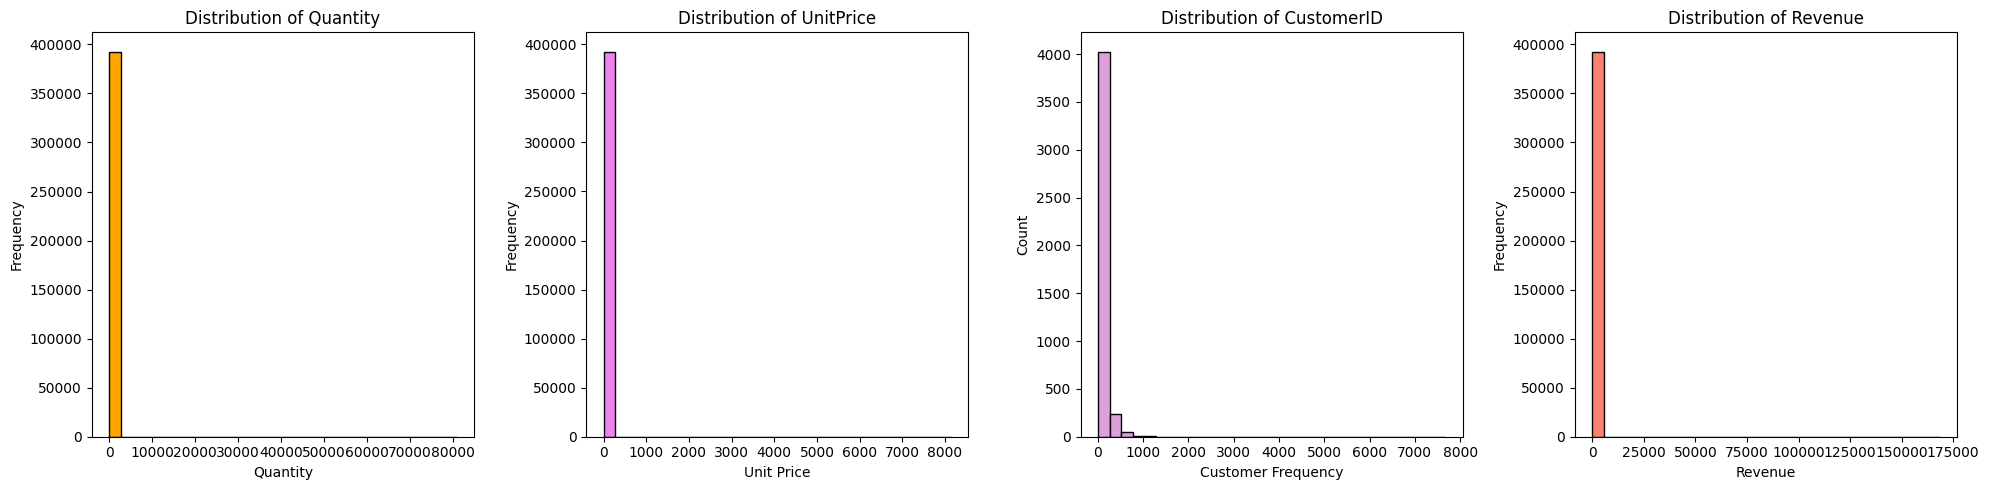

In [20]:
plt.figure(figsize=(20, 5))

# 1. Quantity
plt.subplot(1,4,1)
plt.hist(df['Quantity'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')

# 2. UnitPrice
plt.subplot(1,4,2)
plt.hist(df['UnitPrice'], bins=30, color='violet', edgecolor='black')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Distribution of UnitPrice')

# 3. CustomerID
plt.subplot(1,4,3)
cust_counts = df['CustomerID'].value_counts()
plt.hist(cust_counts, bins=30, color='plum', edgecolor='black')
plt.xlabel('Customer Frequency')
plt.ylabel('Count')
plt.title('Distribution of CustomerID')

# 4. Revenue
plt.subplot(1,4,4)
plt.hist(df['Revenue'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue')

plt.tight_layout()
plt.show()


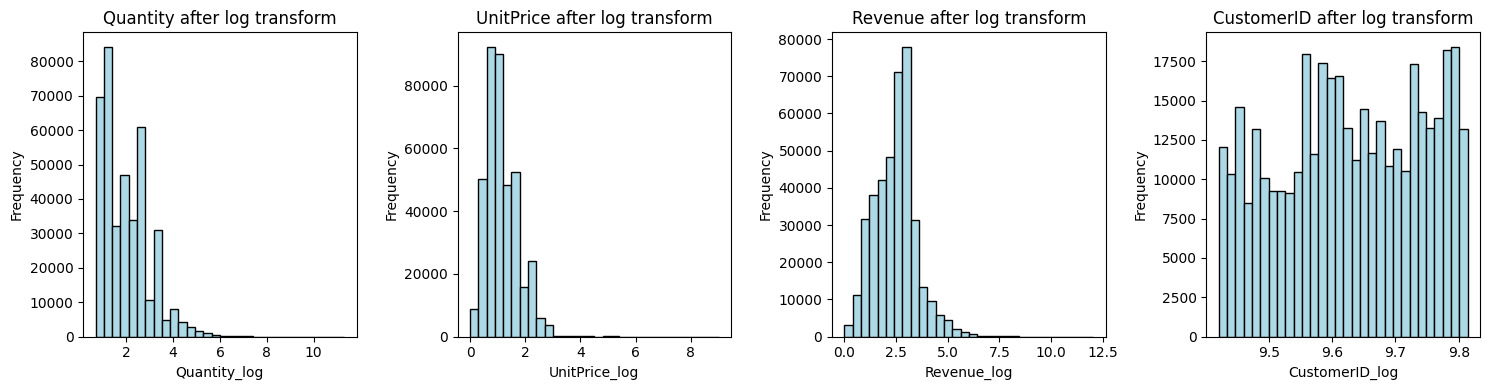

In [21]:
# Numeric columns
num_cols = ['Quantity', 'UnitPrice', 'Revenue','CustomerID',]

# Apply log1p transformation
for col in num_cols:
    # Shift values if <= 0
    if (df[col] <= 0).any():
        df[col] = df[col] + 1 - df[col].min()
    
    df[col + '_log'] = np.log1p(df[col])

# Plot histograms in a single figure using subplots
fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 4))

for i, col in enumerate(num_cols):
    axes[i].hist(df[col + '_log'], bins=30, edgecolor='k', color='lightblue')
    axes[i].set_title(f'{col} after log transform')
    axes[i].set_xlabel(col + '_log')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day,DayofWeek,Quantity_log,UnitPrice_log,Revenue_log,CustomerID_log
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,Wednesday,1.945910,1.266948,2.791165,9.789815
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday,1.945910,1.479329,3.060583,9.789815
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,Wednesday,2.197225,1.321756,3.135494,9.789815
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday,1.945910,1.479329,3.060583,9.789815
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday,1.945910,1.479329,3.060583,9.789815


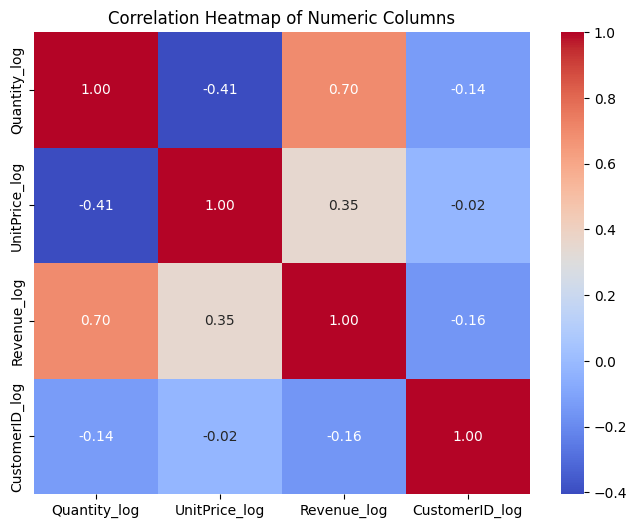

In [23]:
numeric_cols = ['Quantity_log', 'UnitPrice_log', 'Revenue_log', 'CustomerID_log']
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

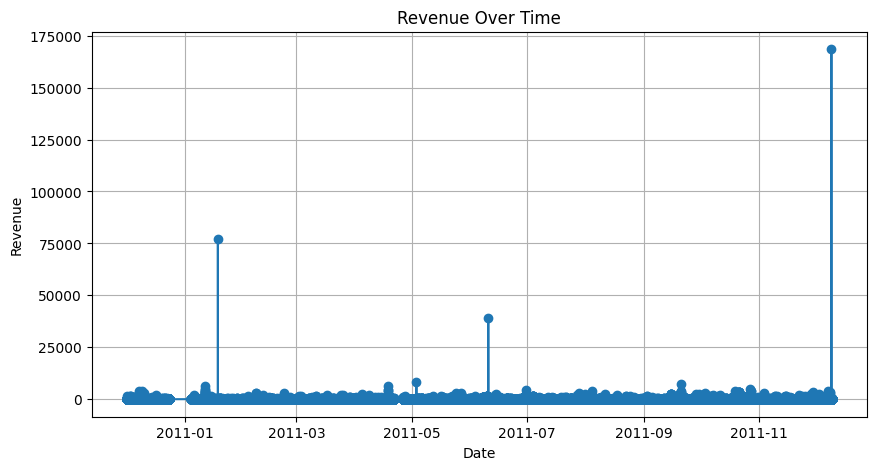

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(df['InvoiceDate'], df['Revenue'], marker='o', linestyle='-')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [25]:
dot_product = np.dot(df['Quantity'], df['UnitPrice'])
print("Dot product (Total revenue):", dot_product)

Dot product (Total revenue): 8887208.894000016


In [26]:
monthly_revenue = df.groupby(["Year", "Month"])["Revenue"].sum().reset_index()
monthly_revenue["dRevenue"] = monthly_revenue["Revenue"].diff()
monthly_revenue.head()

,Year,Month,Revenue,dRevenue
0,2010,12,570422.730,NaN
1,2011,1,568101.310,-2321.420
2,2011,2,446084.920,-122016.390
3,2011,3,594081.760,147996.840
4,2011,4,468374.331,-125707.429


Probability distribution by country:
Country
United Kingdom    0.889254
Germany           0.022982
France            0.021202
EIRE              0.018401
Spain             0.006313
Name: proportion, dtype: float64


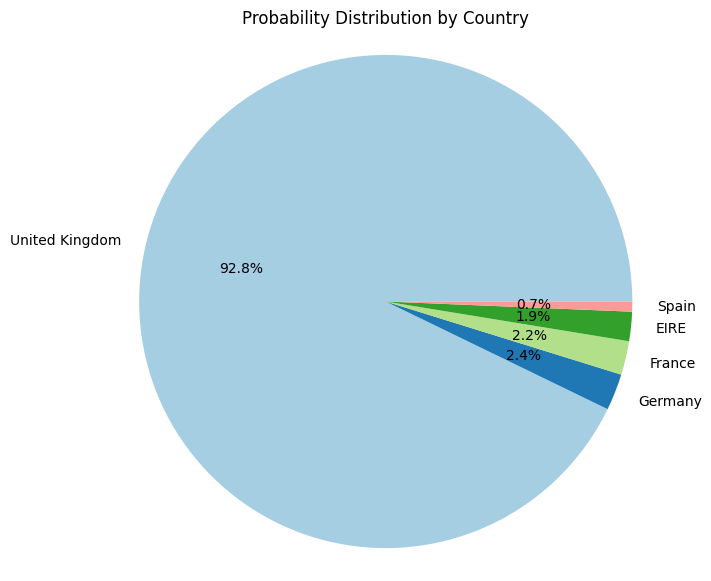

In [27]:
country_prob = df["Country"].value_counts(normalize=True).head()
print("Probability distribution by country:")
print(country_prob)

plt.figure(figsize=(7,7))
plt.pie(country_prob, labels=country_prob.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.title("Probability Distribution by Country")
plt.show()

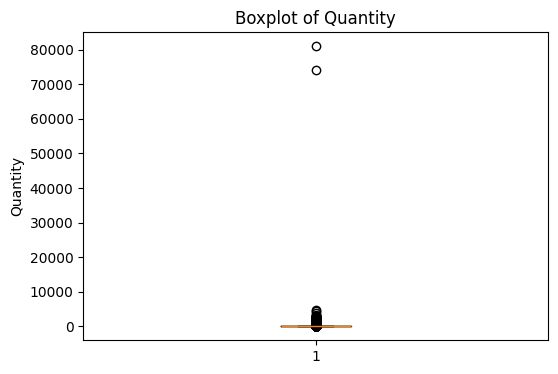

In [28]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Quantity'])
plt.title("Boxplot of Quantity")
plt.ylabel("Quantity")
plt.show()

Correlation Quantity vs UnitPrice: 0.9144507831108564


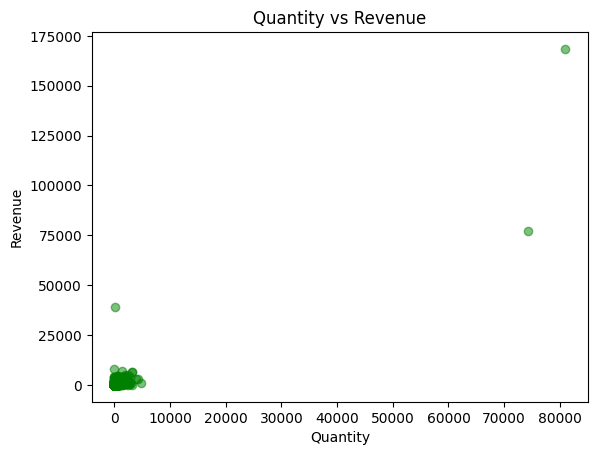

In [29]:
print("Correlation Quantity vs UnitPrice:", df['Quantity'].corr(df['Revenue']))

plt.scatter(df['Quantity'], df['Revenue'], color='green', alpha=0.5)
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.title("Quantity vs Revenue")
plt.show()

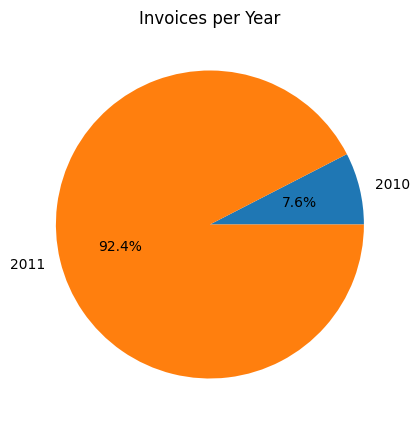

In [30]:
invoice_count_year = df.groupby('Year')['InvoiceNo'].nunique()

plt.figure(figsize=(5,5))
plt.pie(invoice_count_year, labels=invoice_count_year.index, autopct='%1.1f%%')
plt.title("Invoices per Year")
plt.show()

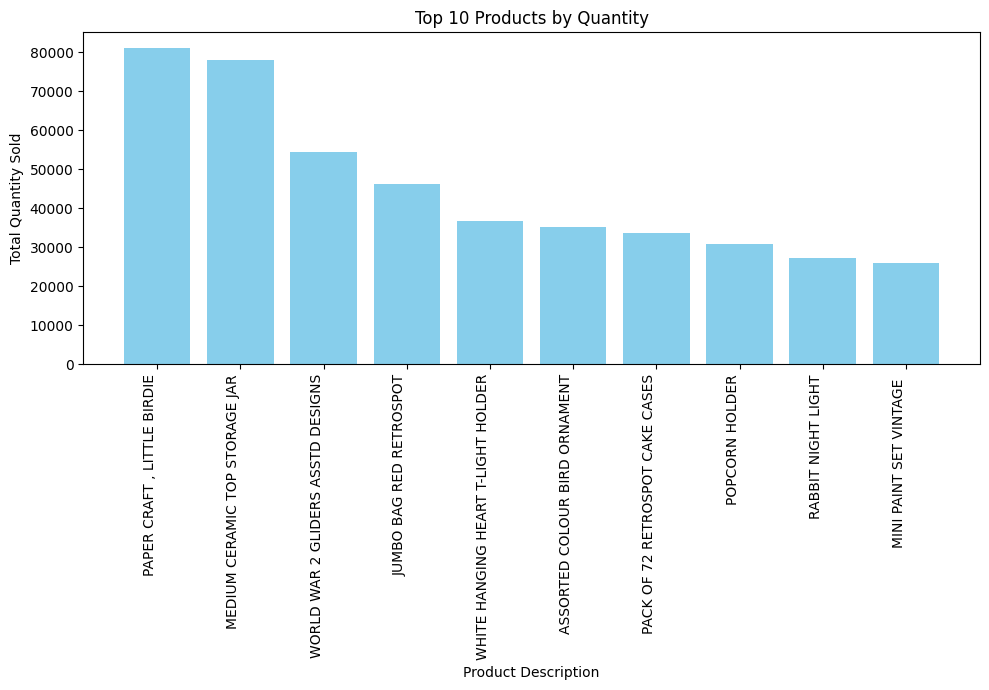

In [31]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 7))
plt.bar(top_products.index, top_products.values, color='skyblue')
plt.xticks(rotation=90, ha='right')
plt.xlabel("Product Description")
plt.ylabel("Total Quantity Sold")
plt.title("Top 10 Products by Quantity")
plt.tight_layout()
plt.show()

       Month                         Description    Revenue
27929     12         PAPER CRAFT , LITTLE BIRDIE  168469.60
1108       1      MEDIUM CERAMIC TOP STORAGE JAR   77183.60
12426      6      PICNIC BASKET WICKER 60 PIECES   39619.50
25139     11                  RABBIT NIGHT LIGHT   23190.41
28284     12            REGENCY CAKESTAND 3 TIER   22113.78
22103     10                              Manual   21183.63
24931     11     PAPER CHAIN KIT 50'S CHRISTMAS    16109.51
2030       1  WHITE HANGING HEART T-LIGHT HOLDER   14962.05
5875       3            REGENCY CAKESTAND 3 TIER   14784.65
25934     11  WHITE HANGING HEART T-LIGHT HOLDER   13849.93


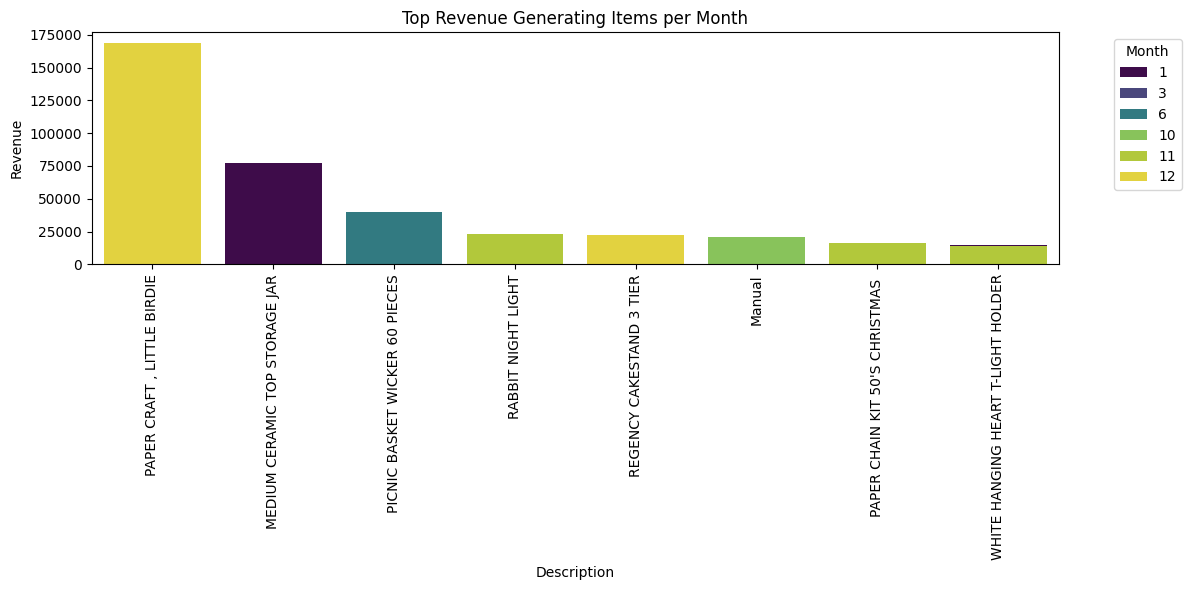

In [46]:
revenue_summary = df.groupby(['Month', 'Description'])['Revenue'].sum().reset_index()

# Get top revenue-generating items overall
top_items = revenue_summary.sort_values(by='Revenue', ascending=False).head(10)
print(top_items)

plt.figure(figsize=(12,6))
sns.barplot(data=top_items, x='Description', y='Revenue', hue='Month', palette='viridis', dodge=False)
plt.ylabel('Revenue')
plt.xlabel('Description')
plt.title('Top Revenue Generating Items per Month')
plt.xticks(rotation=90)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()